In [4]:
from sklearn import tree
import graphviz
import pandas as pd
import pydotplus
from IPython.display import Image

In [5]:
atribut = ['j_kelamin','agama','asal_seklh','j_dipilih','daftr_ulang']
ds=pd.read_csv("data_prjct1.csv", header =None,names=atribut)
ds.head()

,j_kelamin,agama,asal_seklh,j_dipilih,daftr_ulang
0,laki-laki,islam,negeri,IPA,YA
1,laki-laki,islam,negeri,IPS,YA
2,perempuan,kristen,swasta,IPA,TIDAK
3,laki-laki,budha,negeri,IPA,YA
4,perempuan,islam,negeri,IPS,YA


# Menampilkan data calon siswa dengan menggunakan dummie dari data set

In [17]:
calon_siswa = pd.get_dummies(ds[['j_kelamin','agama','asal_seklh','j_dipilih']])
calon_siswa.head()

,j_kelamin_laki-laki,j_kelamin_perempuan,agama_budha,agama_hindu,agama_islam,agama_katolik,agama_kristen,asal_seklh_negeri,asal_seklh_swasta,j_dipilih_IPA,j_dipilih_IPS
0,1,0,0,0,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,1,0,0,1
2,0,1,0,0,0,0,1,0,1,1,0
3,1,0,1,0,0,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,0,1


In [18]:
final = tree.DecisionTreeClassifier(criterion='entropy')
final_train = final.fit(calon_siswa,ds['daftr_ulang'])

In [19]:
dot_data = tree.export_graphviz(final_train, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render() 

'Source.gv.pdf'

In [20]:
dot_data = tree.export_graphviz(final_train, out_file=None,
                                feature_names= list (calon_siswa.columns.values),
                                class_names = ["TIDAK","YA"], rounded=True ,filled=True,special_characters=True) 
                                
grap= pydotplus.graph_from_dot_data(dot_data)

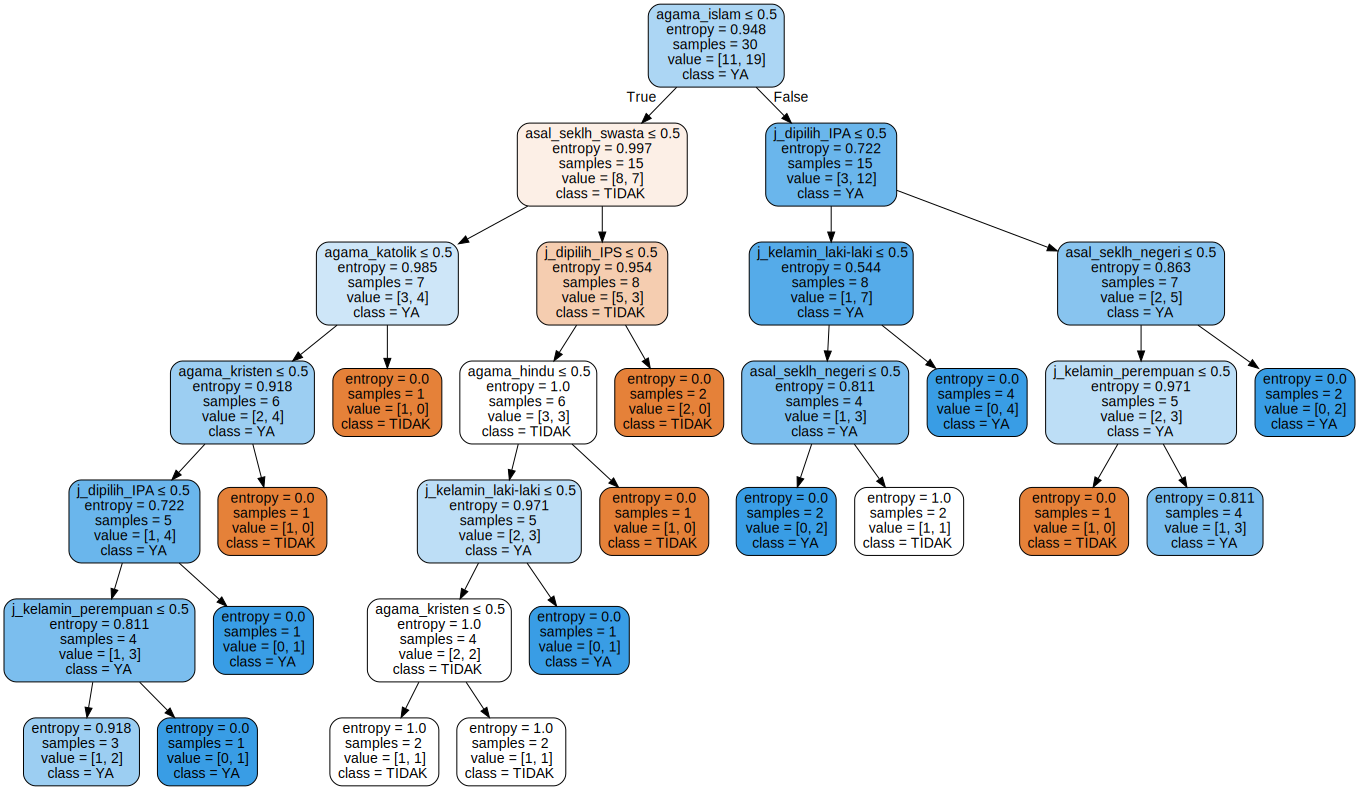

In [21]:
graph = graphviz.Source(dot_data) 
graph